In [39]:
#As always, we import everything
import os
import pandas as pd
import json
import folium
import math
%matplotlib inline
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import base64

We define a RESET constant, that allows the recreation of all graphs and all mappings. We will detail later in the notebook its use.

In [40]:
RESET = False

## Exercise 1

First, let's get the data and put it in a dataframe.
The .tsv file was found on the eurostat website. We had to modify the data so that it is better adapted for our analysis. First, in the dataset we found, there are entries for entities that are not countries and 2 countries that are not in europe.
Moreover, this data lacked information for Switzerland so we added it manually. Using the other website with swiss statistics, we generated the unemployment rates averaged annually to match the data in this dataset. Then inserted them in the file manually.

In [41]:
eu_data = pd.read_table('data/tsdec450.tsv', na_values=': ')

Now, we can process it to get the id for each country.

In [42]:
eu_data['info'] = eu_data['info'].apply(lambda x: x.split(",")[3])
eu_data

info  1990  1991  1992  1993  1994  1995  1996  1997  1998  ...   2007  \
0    AT   NaN   NaN   NaN   NaN   4.3   4.2   4.7   4.7   4.7  ...    4.9   
1    BE   6.6   6.4   7.1   8.6   9.8   9.7   9.5   9.2   9.3  ...    7.5   
2    BG   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    6.9   
3    CY   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    3.9   
4    CZ   NaN   NaN   NaN   4.3   4.3   4.0   3.9   4.8   6.5  ...    5.3   
5    DE   NaN   5.5   6.6   7.8   8.4   8.2   8.9   9.6   9.4  ...    8.5   
6    DK   7.2   7.9   8.6   9.6   7.7   6.7   6.3   5.2   4.9  ...    3.8   
7    EE   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    4.6   
8    GR   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  11.1  ...    8.4   
9    ES  15.5  15.5  17.0  20.8  22.0  20.7  19.9  18.4  16.4  ...    8.2   
10   FI   3.2   6.6  11.7  16.3  16.6  15.4  14.6  12.7  11.4  ...    6.9   
11   FR   7.9   8.1   9.0  10.1  10.4  10.2  10.5  10.7  10.3  ...    8.0   
12   HR   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    9.9   
13   HU   NaN   NaN   NaN   NaN   NaN   NaN   9.9   9.1   8.7  ...    7.4   
14   IE  13.4  14.7  15.4  15.6  14.3  12.3  11.7   9.9   7.5  ...    4.7   
15   IS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    2.3   
16   IT   8.9   8.5   8.8   9.7  10.6  11.2  11.2  11.2  11.3  ...    6.1   
17   LT   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  13.2  ...    4.3   
18   LU   1.7   1.6   2.1   2.6   3.2   2.9   2.9   2.7   2.7  ...    4.2   
19   LV   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    6.1   
20   MT   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    6.5   
21   NL   6.1   5.7   5.7   6.5   7.2   8.3   7.7   6.5   5.1  ...    4.2   
22   NO   5.2   5.5   5.9   6.0   5.4   4.9   4.7   3.9   3.1  ...    2.5   
23   PL   NaN   NaN   NaN   NaN   NaN   NaN   NaN  10.9  10.2  ...    9.6   
24   PT   5.6   5.0   5.0   6.3   7.6   7.9   8.0   7.5   6.1  ...    9.1   
25   RO   NaN   NaN   NaN   NaN   NaN   NaN   NaN   6.1   6.3  ...    6.4   
26   SE   1.7   3.1   5.6   9.1   9.4   8.8   9.6   9.9   8.2  ...    6.1   
27   SI   NaN   NaN   NaN   NaN   NaN   NaN   6.9   6.9   7.4  ...    4.9   
28   SK   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  12.7  ...   11.2   
29   TR   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    9.1   
30   GB   6.9   8.6   9.8  10.2   9.3   8.5   7.9   6.8   6.1  ...    5.3   
31   CH   NaN   NaN   NaN   4.5   4.7   4.2   4.7   5.2   3.9  ...    2.8   

    2008  2009  2010  2011  2012  2013  2014  2015  2016  
0    4.1   5.3   4.8   4.6   4.9   5.4   5.6   5.7   6.0  
1    7.0   7.9   8.3   7.2   7.6   8.4   8.5   8.5   7.8  
2    5.6   6.8  10.3  11.3  12.3  13.0  11.4   9.2   7.6  
3    3.7   5.4   6.3   7.9  11.9  15.9  16.1  15.0  13.0  
4    4.4   6.7   7.3   6.7   7.0   7.0   6.1   5.1   4.0  
5    7.4   7.6   7.0   5.8   5.4   5.2   5.0   4.6   4.1  
6    3.4   6.0   7.5   7.6   7.5   7.0   6.6   6.2   6.2  
7    5.5  13.5  16.7  12.3  10.0   8.6   7.4   6.2   6.8  
8    7.8   9.6  12.7  17.9  24.5  27.5  26.5  24.9  23.6  
9   11.3  17.9  19.9  21.4  24.8  26.1  24.5  22.1  19.6  
10   6.4   8.2   8.4   7.8   7.7   8.2   8.7   9.4   8.8  
11   7.4   9.1   9.3   9.2   9.8  10.3  10.3  10.4  10.1  
12   8.6   9.3  11.8  13.7  15.8  17.4  17.2  16.1  13.4  
13   7.8  10.0  11.2  11.0  11.0  10.2   7.7   6.8   5.1  
14   6.4  12.0  13.9  14.7  14.7  13.1  11.3   9.4   7.9  
15   3.0   7.2   7.6   7.1   6.0   5.4   5.0   4.0   3.0  
16   6.7   7.7   8.4   8.4  10.7  12.1  12.7  11.9  11.7  
17   5.8  13.8  17.8  15.4  13.4  11.8  10.7   9.1   7.9  
18   4.9   5.1   4.6   4.8   5.1   5.9   6.0   6.5   6.3  
19   7.7  17.5  19.5  16.2  15.0  11.9  10.8   9.9   9.6  
20   6.0   6.9   6.9   6.4   6.3   6.4   5.8   5.4   4.7  
21   3.7   4.4   5.0   5.0   5.8   7.3   7.4   6.9   6.0  
22   2.5   3.2   3.6   3.3   3.2   3.5   3.5   4.4   4.7  
23   7.1   8.1   9.7   9.7  10.1  10.3   9.0 

Now we can define a function that returns the color of a country based on its unemployement rate.
For this, we need to choose a palette of colors : we used colorbrewer to get one which is color-blind friendly.
To get the color for a country, we simply bin all the unemployement_rate into one of the colors.

We decided to use a linear scale from the lowest unemployement value to the highest in our data.

Later on, we will need to get the full name for each country. We chose to create the mapping from country id to country name, as both the id and the name are available in the topoJSON values. This mapping is only recreated if the RESET constant is set to True. Otherwise, we will load it from a JSON file.

In [43]:
colors_unemployement = ['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000']
min_unemployement_eu = eu_data['2016'].min()
max_unemployement_eu = eu_data['2016'].max()

id_country_mapping = {}

def get_color_eu(country, properties):
    if RESET:
        global id_country_mapping
        id_country_mapping[country] = properties['NAME']
    
    values = eu_data.loc[eu_data['info'] == country, '2016'].values
    if len(values) == 0:
        return '#000000'
    
    unemployement_rate = values[0]
    ratio = (unemployement_rate - min_unemployement_eu) / (max_unemployement_eu - min_unemployement_eu)
    index = math.floor(ratio * len(colors_unemployement))
    if index == len(colors_unemployement):
        index = index - 1
    return colors_unemployement[index]

We also define a function that checks if a country is in the dataframe, and if not, we make its overly transparent.

In [44]:
def get_opacity_eu(country):
    values = eu_data.loc[eu_data['info'] == country, '2016'].values
    return 1 if len(values) > 0 else 0

Now we can create the Europe map, and add the overlay, using the previous functions.

The second map is only used to display the key.
We used to following website to convert the topojson file to gejson
https://jeffpaine.github.io/geojson-topojson/
Note that we cannot use only the choropleth map since there are countries for which we do not have the data. We'd like these countries to be transparent so we only use that map for the key.

In [45]:
map_eu = folium.Map([51,15], tiles='cartodbpositron', zoom_start=4)


# Color of the country
folium.TopoJson(
    open('topojson/europe.topojson.json'),
    object_path='objects.europe',
    style_function=lambda feature: {
        'fillOpacity' : get_opacity_eu(feature['id']), #opacity for the fill color
        'opacity' : get_opacity_eu(feature['id']), #opacity for the borders
        'fillColor': get_color_eu(feature['id'], feature['properties']),
        'color' : 'black',
        'weight' : 1
        }
).add_to(map_eu)
 
map_eu.choropleth(geo_data='topojson/europe.geojson.json',data=eu_data,
             columns=['info', '2016'],
             key_on='feature.id',
             fill_color='OrRd',
             fill_opacity=0, 
             line_opacity=0.0,
             legend_name='Percentage of unemployement in country')

For interactivity, we decided to place, for each country a popup displaying the graph of unemployement from 1990 to 2016. Folium provides a way to add a marker, that when clicked on, displays a popup.

Thus, we first need to get, for each country its center to place the marker at the right coordinates.
We used the geopy library to do this.

As this operation is quite slow, and not 100% accurate for each country, we decided to create a mapping using the library, then save it to a JSON, and finally to manually edit this JSON if the coordinates were not accurate.
When this was done, we only need to reload this JSON, not recreate it each time the notebook is run.

In [46]:
if RESET:
    position_mapping = {}
    geolocator = Nominatim()
    for country_id in eu_data['info']:
        if country_id in id_country_mapping:
            location = geolocator.geocode(id_country_mapping[country_id])
            if (location):
                position_mapping[country_id] = [location.latitude,location.longitude]

    with open('position_mapping.json', 'w') as outfile:
        json.dump(position_mapping, outfile)

    with open('id_country_mapping.json', 'w') as outfile:
        json.dump(id_country_mapping, outfile)
else:
    with open('position_mapping.json', 'r') as infile:
        position_mapping = json.load(infile)

    with open('id_country_mapping.json', 'r') as infile:
        id_country_mapping = json.load(infile)

Now that we have the positions, for each country we create a graph and save it. We used the previously defined id_country_mapping to get the full name of each country.

In [47]:
if RESET:
    for index, row in eu_data.iterrows():
        global id_country_mapping

        if row.values[0] in id_country_mapping:
            row_values = row.iloc[1:].astype(float)
            plot = row_values.transpose().plot()
            plt.ylim(0,30)
            plt.xlabel('Year')
            plt.ylabel('% of unemployed')
            plt.title('Graph of unemployment in ' + id_country_mapping[row.values[0]])
            plt.savefig('eu_graphs/graph_' + row.values[0] + '.png')
            plt.close()

We decided to host all the graphs on our personal server, in order to keep the maps at a low size.

Now that we have both the graphs and the positions, we can, for each country, place a custom marker (the country's flag) that displays the corresponding graph when clicked.

You can see the map here : 

https://nbviewer.jupyter.org/github/RadoslawDryzner/LeRepoDuGuerrier/blob/master/Homework03/map_eu.ipynb

In [48]:
all_markers = folium.FeatureGroup("Markers")
for country_id in eu_data['info']:
    if country_id in position_mapping:
        location = position_mapping[country_id]
        if location:
            html = '<img src="http://feudal-ambitions.com/ADA/HW3/eu_graphs/graph_' + country_id + '" width=450 height=300>'
            iframe = folium.IFrame(html, width=470, height=320)
            popup = folium.Popup(iframe, max_width=2650)

            custom_icon = folium.features.CustomIcon("http://feudal-ambitions.com/ADA/HW3/eu_flags/" + country_id.lower() + ".png", icon_size=(25, 25))
            all_markers.add_child(folium.Marker(location, popup=popup, icon=custom_icon))


map_eu.add_child(all_markers)
map_eu

In this map, we can see that southern and western european countries have the highest unemployment on the continent. Some of these countries such as Greece or Spain experiences financial cirses in recent times which explain these large number. Moreover, thanks to our interactive graphs, we can visualise the evolution of many countries such as Poland which today has a low unemployment rate but historically exprienced very high unemployment.

When it comes to Switzerland, we can see that it's in the lower unemployment bracket. In fact, Swiss unemployment rate is among te lowest and has been historically very low, even during crises that touched most other European countries.

## Exercise 2

For this exercise, we generate a .csv file from the amstat swiss statistics website. The file we get from the site is the one that shows unemployment rates. These rates are defined on the website as the number of unemployed people divided by the active population of the canton scaled by 100. We modified the file manually to remove some useless title columns and lines and changed the names of the cantons into their codes.

In [49]:
ch_data = pd.read_csv('data/unemployed_switzerland.csv')

In [50]:
ch_data

Canton  1993  1994  1995  1996  1997  1998  1999  2000  2001  ...   2008  \
0      ZH   3.5   4.7   4.2   4.0   5.3   5.1   3.6   2.2   1.7  ...    2.7   
1      BE   3.4   4.5   3.9   3.7   4.9   4.0   2.5   1.8   1.3  ...    2.0   
2      LU   3.0   4.0   3.4   3.7   4.8   4.0   2.6   1.6   1.3  ...    2.2   
3      UR   1.7   2.2   1.9   2.4   3.5   2.4   1.5   0.9   0.6  ...    1.0   
4      SZ   2.1   2.8   2.1   2.7   3.8   3.0   2.1   1.0   0.6  ...    1.5   
5      OW   1.7   2.2   1.9   2.1   2.8   1.9   0.8   0.4   0.5  ...    1.2   
6      NW   3.3   3.2   2.4   2.4   3.3   2.2   1.1   0.5   0.5  ...    1.2   
7      GL   2.0   2.5   1.8   3.0   3.9   3.2   2.0   1.5   0.8  ...    1.5   
8      ZG   3.6   4.2   3.2   3.1   4.2   3.6   2.8   1.5   1.1  ...    1.8   
9      FR   4.1   6.2   5.8   5.2   5.5   4.9   3.4   2.1   1.5  ...    2.9   
10     SO   4.0   5.0   3.8   4.0   5.9   5.7   3.1   2.2   1.5  ...    2.5   
11     BS   4.9   6.3   5.5   4.7   5.3   4.8   3.1   2.4   2.2  ...    3.1   
12     BL   2.9   3.9   3.4   3.2   3.9   3.6   2.1   1.6   1.3  ...    2.4   
13     SH   3.6   4.9   4.2   4.4   5.6   5.6   3.5   2.3   1.9  ...    2.5   
14     AR   2.4   3.1   2.1   2.1   2.7   2.4   1.2   1.0   1.0  ...    1.5   
15     AI   1.6   1.7   0.9   1.3   2.0   1.6   0.6   0.5   0.3  ...    1.1   
16     SG   2.9   3.7   3.0   3.1   4.5   3.6   2.6   1.8   1.3  ...    1.9   
17     GR   1.6   2.2   2.2   2.6   3.2   3.5   2.3   1.2   1.2  ...    1.3   
18     AG   2.8   3.7   3.0   3.4   4.9   3.8   2.7   1.7   1.3  ...    2.5   
19     TG   2.4   3.3   2.8   3.2   4.5   4.4   2.8   1.6   1.2  ...    2.1   
20     TI   6.2   7.8   7.4   8.5   9.2   8.9   6.4   4.7   3.5  ...    4.9   
21     VD   6.0   8.1   7.7   7.3   8.3   6.9   5.1   3.6   2.9  ...    4.1   
22     VS   6.0   8.3   8.3   7.7   8.9   7.5   5.6   3.9   3.0  ...    4.2   
23     NE   5.8   7.0   6.4   5.8   6.3   6.4   4.9   3.3   2.1  ...    3.6   
24     GE   6.2   8.0   7.8   6.9   7.8   7.4   5.6   4.6   3.9  ...    5.9   
25     JU   5.0   7.1   5.7   6.1   7.4   6.5   3.7   2.7   1.8  ...    3.2   

    2009  2010  2011  2012  2013  2014  2015  2016  2017  
0    3.0   4.1   3.4   3.0   3.4   3.4   3.5   3.8   3.9  
1    2.3   3.1   2.6   2.2   2.5   2.6   2.6   2.9   3.0  
2    2.6   3.0   2.1   2.1   2.2   2.1   2.1   2.3   2.2  
3    1.3   1.8   1.5   1.7   1.7   1.5   1.5   1.3   1.5  
4    1.8   2.3   1.8   1.6   1.6   1.8   1.7   2.0   2.0  
5    1.5   1.6   0.9   0.9   0.9   1.1   0.9   1.0   1.0  
6    1.6   2.0   1.2   0.9   1.0   1.1   1.2   1.3   1.3  
7    2.0   3.0   2.3   2.4   2.8   2.7   2.2   2.6   2.5  
8    2.4   3.0   2.2   1.9   2.2   2.4   2.3   2.5   2.6  
9    3.4   3.3   2.6   2.6   3.1   3.1   3.1   3.4   3.2  
10   3.0   4.3   3.0   2.5   3.1   2.8   2.6   3.2   3.2  
11   3.5   4.7   4.3   3.8   4.1   3.7   3.9   4.0   4.2  
12   2.7   3.7   3.2   2.9   2.9   2.8   2.8   3.1   3.1  
13   2.5   4.0   2.7   2.5   3.0   3.1   3.3   3.5   3.6  
14   1.9   2.3   1.9   1.5   1.8   1.8   2.0   2.1   2.0  
15   1.2   1.4   1.0   1.2   1.7   1.4   1.3   1.3   1.4  
16   2.6   3.6   2.7   2.4   2.8   2.6   2.4   2.8   2.7  
17   1.7   1.8   1.8   1.8   2.0   2.0   2.0   2.1   1.9  
18   2.9   3.6   3.0   2.9   3.1   3.1   3.1   3.4   3.5  
19   2.6   3.5   2.6   2.2   2.7   2.7   2.5   2.9   2.6  
20   5.1   5.4   5.4   4.9   5.2   4.9   4.6   4.2   4.0  
21   4.6   5.5   5.1   4.9   5.3   5.1   4.9   5.1   5.2  
22   4.8   5.1   4.5   4.5   5.3   5.2   5.4   5.5   5.2  
23   4.3   7.1   5.9   4.8   5.5   5.6   5.6   6.1   6.6  
24   6.2   6.9   6.5   5.2   5.5   5.7   5.5   5.8   5.7  
25   4.0   6.0   4.7   3.5   4.0   4.1   4.2   4.8   5.3  

[26 rows x 26 columns]

We define similar functions for constructing the canton mappings to IDs and their location. Everything is almost the same as for EU countries. Like for Europe we generate a geojson to display the choropleth map. For the markers on the Swiss map, we put each canton's coat-of-arms.

In [51]:
colors_unemployement = ['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000']
min_unemployement_ch = ch_data['2017'].min()
max_unemployement_ch = ch_data['2017'].max()

id_canton_mapping = {}

def get_color_ch(canton, properties):
    global id_canton_mapping
    id_canton_mapping[canton] = properties['name']
    
    values = ch_data.loc[ch_data['Canton'] == canton, '2017'].values
    if len(values) == 0:
        return '#000000'
    
    unemployement_rate = values[0]
    ratio = (unemployement_rate - min_unemployement_ch) / (max_unemployement_ch - min_unemployement_ch)
    index = math.floor(ratio * len(colors_unemployement))
    if index == len(colors_unemployement):
        index = index - 1
    return colors_unemployement[index]

In [52]:
map_ch = folium.Map([46.8,8.3], tiles='cartodbpositron', zoom_start=8)

map_ch.choropleth(geo_data='topojson/ch-cantons.geojson.json',data=ch_data,
             columns=['Canton', '2017'],
             key_on='feature.id',
             fill_color='OrRd',
             fill_opacity=1, 
             line_opacity=1,
             legend_name='Percentage of unemployement in canton')

In [53]:
if RESET:
    position_canton_mapping = {}
    geolocator = Nominatim()
    for canton_id in id_canton_mapping:
        location = geolocator.geocode(id_canton_mapping[canton_id])
        if (location):
            position_canton_mapping[canton_id] = [location.latitude,location.longitude]

    with open('position_canton_mapping.json', 'w') as outfile:
        json.dump(position_canton_mapping, outfile)
    
    with open('id_canton_mapping.json', 'w') as outfile:
        json.dump(id_canton_mapping, outfile)
else:
    with open('position_canton_mapping.json', 'r') as infile:
        position_canton_mapping = json.load(infile)
    with open('id_canton_mapping.json', 'r') as infile:
        id_canton_mapping = json.load(infile)

In [54]:
if RESET:
    for index, row in ch_data.iterrows():
        global id_canton_mapping

        if row.values[0] in id_canton_mapping:
            row_values = row.iloc[1:].astype(float)
            plot = row_values.transpose().plot()
            plt.ylim(0,30)
            plt.xlabel('Year')
            plt.ylabel('% of unemployed')
            plt.title('Graph of unemployment in ' + id_canton_mapping[row.values[0]])
            plt.savefig('ch_graphs/graph_' + row.values[0] + '.png')
            plt.close()

You can see the map here : 

https://nbviewer.jupyter.org/github/RadoslawDryzner/LeRepoDuGuerrier/blob/master/Homework03/map_ch.ipynb

In [55]:
all_markers = folium.FeatureGroup("Markers")
for canton_id in id_canton_mapping:
    location = position_canton_mapping[canton_id]
    
    html = '<img src="http://feudal-ambitions.com/ADA/HW3/ch_graphs/graph_' + canton_id + '" width=450 height=300>'
    iframe = folium.IFrame(html, width=470, height=320)
    popup = folium.Popup(iframe, max_width=2650)

    custom_icon = folium.features.CustomIcon("http://feudal-ambitions.com/ADA/HW3/ch_flags/" + canton_id + ".png", icon_size=(25, 30))
    all_markers.add_child(folium.Marker(location, popup=popup, icon=custom_icon))
        


map_ch.add_child(all_markers)
map_ch

As before, we added unemployment evolution graphs for interactivity.

We can note on this map that western regions seem to have higher unemplyment rates than eastern regions. As a general rule, the cantons of the french speaking Romandie seem to experience higher unemployment rates. Zurich, which houses the largest city of the country also has hightened unemployment rate. The cantons that have the least unemployment are mostly in the inner or mountainous Swiss regions and all have low, rural populations.

Now we would like to view the statistics containing the jobseekers that are currently employed. Unfortunetely, the website does not provide the rate of all jobseekers in the population. So we calculate these rates ourselves.

First we take the numbers of all jobseekers and the number of jobless jobseekers (not the rates). Using the number of unemployed people and the numbers, we calculate the active population of the cantons. Then we can calculate the rate of all jobseekers (employer or not) in the canton.

In [56]:
ch_data2 = pd.read_csv('data/unemployed_num_switzerland.csv', thousands="'")
ch_data3 = pd.read_csv('data/jobseekers_switzerland.csv', thousands="'")
ch_data4 = pd.read_csv('data/unemployed_foreigner_swiss.csv', thousands="'")

In [57]:
active_pop = ((ch_data2.iloc[:, 1:] * 100) / ch_data.iloc[:, 1:])
ch_jobseeker_rate = (ch_data3.iloc[:, 1:] * 100) / active_pop
ch_jobseeker_rate = pd.concat((ch_data['Canton'], ch_jobseeker_rate), axis=1)
ch_jobseeker_rate

Canton      1993      1994      1995       1996       1997       1998  \
0      ZH  3.543061  4.847424  4.372379   4.655738   6.022974   6.475108   
1      BE  3.517128  4.804882  4.280949   4.339431   5.871509   5.467204   
2      LU  3.025438  4.158790  3.679684   4.009896   5.289272   5.232825   
3      UR  1.700000  2.341341  2.063036   2.737500   4.173077   3.715736   
4      SZ  2.111713  2.993910  2.444853   3.030438   4.498792   4.787234   
5      OW  1.728452  2.291374  1.975725   2.219398   3.211765   2.735165   
6      NW  3.300000  3.421091  2.496682   2.503103   3.539378   3.019948   
7      GL  2.035806  2.596349  1.849180   3.262185   4.326175   4.387421   
8      ZG  3.633823  4.336228  3.291550   3.467655   4.744444   4.393782   
9      FR  4.194878  6.479762  6.352161   6.686509   8.277768   8.190906   
10     SO  4.024351  5.060775  3.928911   4.213125   6.147207   6.001173   
11     BS  5.109543  6.639031  5.925323   5.485455   6.402801   6.138855   
12     BL  2.990097  4.161402  3.726205   3.512448   4.454258   4.471139   
13     SH  3.925839  5.994227  5.799231   5.615894   6.831524   7.206887   
14     AR  2.400000  3.208772  2.165625   2.194595   3.080669   2.851185   
15     AI  1.600000  1.714530  0.943548   1.314444   2.201439   2.285714   
16     SG  3.020253  3.868099  3.222018   3.471150   5.101528   5.106267   
17     GR  1.622284  2.444566  2.340568   2.775446   3.519110   4.299968   
18     AG  2.856103  3.813779  3.137931   3.519983   5.088768   5.334089   
19     TG  2.409234  3.551331  3.060007   3.529370   4.995046   5.350148   
20     TI  6.653606  8.865519  9.267670  10.922964  12.933840  13.284955   
21     VD  6.164168  8.587006  8.596616   9.419059  10.674620  10.140381   
22     VS  6.092295  8.379713  8.467644   9.607070  11.531091  11.907687   
23     NE  5.963414  8.278220  7.885037   7.737658   8.537206   8.877078   
24     GE  6.238616  8.090732  7.883246   9.097760  10.089761  10.150841   
25     JU  5.033951  7.256078  5.870787   6.319625   7.702419   7.190238   

         1999      2000      2001    ...         2008      2009      2010  \
0    5.381440  3.386926  2.469623    ...     3.651884  3.832379  4.888359   
1    4.438869  3.159725  2.075281    ...     3.059690  3.249269  4.249063   
2    4.126214  2.542723  2.036595    ...     3.367720  3.812309  4.378942   
3    2.607143  1.676471  1.121212    ...     1.748571  2.121973  2.805263   
4    3.795830  2.158389  1.264615    ...     2.514870  2.950312  3.497541   
5    1.940000  1.188060  1.403614    ...     2.616667  2.358779  2.605310   
6    2.488525  1.426316  1.630208    ...     2.666667  2.576687  3.054705   
7    3.368159  2.531546  1.428571    ...     3.355519  3.781095  5.090639   
8    4.003620  2.119710  1.791228    ...     3.063939  3.635897  4.404624   
9    6.804697  4.580595  3.360390    ...     4.650493  5.367301  5.357220   
10   4.986670  3.585886  2.507014    ...     4.027652  4.278713  5.760072   
11   4.523725  3.769058  3.421106    ...     4.482596  5.104938  6.532745   
12   3.500750  2.671852  2.093351    ...     3.280000  3.543885  4.510288   
13   5.468093  4.096480  3.584667    ...     4.630567  4.301619  6.494598   
14   2.062500  1.503597  1.517123    ...     2.125592  2.482482  3.605961   
15   1.258537  0.775000  0.600000    ...     1.709639  1.741935  2.005085   
16   4.203287  2.858366  2.161508    ...     3.200242  3.946421  5.057612   
17   3.728326  2.401891  2.219549    ...     2.664662  3.100711  3.148879   
18   4.442834  2.887635  2.119823    ...     3.611407  3.990320  4.781631   
19   4.174545  2.566650  1.971771    ...     3.320702  3.709312  4.644015   
20  10.386335  7.605025  5.775614    ...     6.869880  6.947944  7.421866   
21   7.794234  5.490156  4.518626    ...     5.646355  6.125189  7.011516   
22   9.883640  6.982548  5.497932    ...     7.011041  7.494942  7.439553   
23   7.843500  5.607308  3.366262    ...     5.503302  6.001099  9.270291   
24   8.916381  7.216715  

In [58]:
active_pop.to_csv('data/pop_canton.csv')

As before, we redefine the necessary functions with small changes.

In [59]:
colors_unemployement = ['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000']
min_jobseeker_ch = ch_jobseeker_rate['2017'].min()
max_jobseeker_ch = ch_jobseeker_rate['2017'].max()

def get_color_ch_j(canton, properties):
    values = ch_jobseeker_rate.loc[ch_jobseeker_rate['Canton'] == canton, '2017'].values
    if len(values) == 0:
        return '#000000'
    
    jobseeker_rate = values[0]
    ratio = (jobseeker_rate - min_jobseeker_ch) / (max_jobseeker_ch - min_jobseeker_ch)
    index = math.floor(ratio * len(colors_unemployement))
    if index == len(colors_unemployement):
        index = index - 1
    return colors_unemployement[index]


In [60]:
map_ch_j = folium.Map([46.8,8.3], tiles='cartodbpositron', zoom_start=8)

map_ch_j.choropleth(geo_data='topojson/ch-cantons.geojson.json',data=ch_jobseeker_rate,
             columns=['Canton', '2017'],
             key_on='feature.id',
             fill_color='OrRd',
             fill_opacity=1, 
             line_opacity=1,
             legend_name='Percentage of jobseekers in canton')

In [61]:
if RESET:
    for index, row in ch_jobseeker_rate.iterrows():
        global id_canton_mapping
        row_values = row.iloc[1:].astype(float)
        plot = row_values.transpose().plot()
        plt.ylim(0,30)
        plt.xlabel('Year')
        plt.ylabel('% of unemployed')
        plt.title('Graph of jobseekers in ' + id_canton_mapping[row.values[0]])
        plt.savefig('ch_graphs/graph_j_' + row.values[0] + '.png')
        plt.close()

You can see the map here : 

https://nbviewer.jupyter.org/github/RadoslawDryzner/LeRepoDuGuerrier/blob/master/Homework03/map_jobseekers_ch.ipynb

In [62]:
all_markersj = folium.FeatureGroup("Markers")
for canton_id in id_canton_mapping:
    location = position_canton_mapping[canton_id]
    
    html = '<img src="http://feudal-ambitions.com/ADA/HW3/ch_graphs/graph_j_' + canton_id + '" width=450 height=300>'
    iframe = folium.IFrame(html, width=470, height=320)
    popup = folium.Popup(iframe, max_width=2650)

    custom_icon = folium.features.CustomIcon("http://feudal-ambitions.com/ADA/HW3/ch_flags/" + canton_id + ".png", icon_size=(25, 30))
    all_markersj.add_child(folium.Marker(location, popup=popup, icon=custom_icon))

map_ch_j.add_child(all_markersj)
map_ch_j

In this case we see that in general the rates are higher which makes sense since we add to unemployed people the employed jobseekers. Moreover we see that Romandie still has the highest rates although this can be explained by the original high unemployment figures. We can see some changes in how the cantons are ranked in the rates like Valais for example.

## Exercice 3

In [63]:
ch_data4
ch_foreigner = ch_data4[ch_data4.Nationalité == 'Etrangers']
ch_foreigner.index = range(0,len(ch_foreigner))
ch_foreigner = ch_foreigner.drop('Nationalité', axis=1)
ch_swiss = ch_data4[ch_data4.Nationalité == 'Suisses']
ch_swiss.index = range(0,len(ch_swiss))
ch_swiss = ch_swiss.drop('Nationalité', axis=1)

In [64]:
ch_swiss_rate = (ch_swiss.iloc[:, 1:] * 100) / active_pop
ch_swiss_rate = pd.concat((ch_data['Canton'], ch_swiss_rate), axis=1)
ch_foreigner_rate = (ch_foreigner.iloc[:, 1:] * 100) / active_pop
ch_foreigner_rate = pd.concat((ch_data['Canton'], ch_foreigner_rate), axis=1)

In [65]:
ch_swiss

Canton   1993   1994   1995   1996   1997   1998   1999  2000  2001  ...    \
0      ZH  13860  18463  15721  13929  18376  16693  11301  7665  6293  ...     
1      BE  11454  15289  12692  11632  15291  12155   7158  5371  4113  ...     
2      LU   3386   4211   3324   3378   4308   3515   2188  1443  1236  ...     
3      UR    198    214    186    233    378    233    147    92    50  ...     
4      SZ    727    922    655    835   1148    796    600   382   258  ...     
5      OW    174    203    161    180    262    176     74    41    52  ...     
6      NW    440    404    326    306    411    259    123    64    69  ...     
7      GL    245    273    207    275    330    295    191   165    86  ...     
8      ZG   1046   1169    808    772   1072    923    726   508   326  ...     
9      FR   3268   4829   4427   3639   3653   3147   2051  1480  1061  ...     
10     SO   3007   3791   2840   2711   3887   3709   1961  1476   887  ...     
11     BS   2856   3481   2877   2274   2582   2263   1501  1129  1068  ...     
12     BL   2093   3012   2563   2423   2869   2514   1594  1365  1106  ...     
13     SH    781   1015    768    816    971    946    550   376   331  ...     
14     AR    367    470    332    288    360    356    184   152   202  ...     
15     AI     62     68     37     51     72     59     25    23    13  ...     
16     SG   3559   4637   3764   3484   4816   3643   2547  2018  1570  ...     
17     GR    976   1377   1315   1485   1861   1969   1187   727   707  ...     
18     AG   4428   5843   4449   4915   6905   4994   3499  2488  1937  ...     
19     TG   1507   1942   1546   1644   2325   2303   1350  1018   858  ...     
20     TI   4583   5597   5176   5702   5993   5856   4231  3297  2406  ...     
21     VD  11336  15119  14013  12727  13995  11412   8698  6174  5024  ...     
22     VS   4755   6462   6529   5815   6400   5340   3830  2901  2285  ...     
23     NE   3085   3663   3247   2845   3071   3103   2288  1508  1053  ...     
24     GE   7276   9326   9218   7830   8550   8316   6128  5324  4728  ...     
25     JU   1252   1823   1447   1466   1728   1521    876   658   422  ...     

     2008   2009   2010   2011   2012   2013   2014   2015   2016   2017  
0   10780  12276  18420  15053  13508  14449  15355  15251  16658  17327  
1    6724   7759  10977   9195   7627   8568   9279   9212   9980  10284  
2    2425   2788   3793   2580   2560   2575   2653   2485   2876   2764  
3     110    112    208    153    157    167    133    119    112    122  
4     633    694   1049    811    693    727    822    762    881    959  
5     128    152    195    116     99    103    145    106    109    114  
6     182    217    322    192    141    159    158    168    186    172  
7     183    216    387    279    301    313    325    242    265    284  
8     597    803   1056    799    684    783    866    811    915    929  
9    2023   2275   2723   2152   2031   2250   2529   2497   2804   2495  
10   1823   2181   3432   2513   2127   2571   2274   2132   2539   2590  
11   1607   1694   2193   1966   1775   1889   1725   1760   1760   1849  
12   2037   2305   3375   2935   2557   2591   2558   2418   2670   2706  
13    522    521    892    605    581    679    680    677    744    773  
14    285    335    433    345    279    321    345    366    363    379  
15     47     60     76     54     58     86     69     71     55     58  
16   2447   3191   4908   3724   3376   3680   3552   3302   3819   3752  
17    694    860   1004    938    877    915    919    883    958    875  
18   4125   4701   6886   5706   5273   5753   5822   5821   6372   6311  
19   1481   1767   2790   2038   1781   1996   2066   1848   2145   1917  
20   3785   3774   4452   4430   3866   4039   3913   3802   3578   3452  
21   7053   7718  10328   9496   8931   9360   9296   9047   9467   9749  
22   2665   2845   3566   3190   2859   3375   3562   3776   4050   3716  
23   1741   198

As always, we decided to show the graphs of unemployement, this time, for both Swiss and foreigners.

In [66]:
if RESET:
    for index, row in ch_swiss_rate.iterrows():
        global id_canton_mapping
        row_values = row.iloc[2:].astype(float)
        plot = row_values.transpose().plot()
        row_values = ch_foreigner_rate.iloc[index][2:].astype(float)
        plot = row_values.transpose().plot()
        plt.ylim(0,10)
        plt.legend(['Swiss', 'Foreigners'])
        plt.xlabel('Year')
        plt.ylabel('% of unemployed')
        plt.title('Graph of unemployment in ' + id_canton_mapping[row.values[0]])
        plt.savefig('ch_graphs/graph_s_f_' + row.values[0] + '.png')
        plt.close()

In order to display the most informations in a single map, we decided to show small bar plots for each canton, showing the Swiss and the foreigners unemployement rates, as well as a color for each canton, indicating the difference.

First, we need to create these small bar plots, and save them. The produced graphs are then hosted on our personal server. As always, we only create them if RESET is set to true.

In [67]:
if RESET:
    for index, row in ch_swiss_rate.iterrows():
        global id_canton_mapping
        row_values = [row.iloc[-1], ch_foreigner_rate.iloc[index][-1]]
        plot = plt.bar([0,1], row_values, edgecolor='black',linewidth=10)
        plot[0].set_color('b')
        plot[0].set_linewidth(30)
        plot[1].set_color('orange')

        plt.ylim(0,6)
        plt.axis('off')
        plt.savefig('icon_ch/icon_' + row.values[0] + '.png')
        plt.close()

Now, we can write the function that outputs a color based on the difference between the two unemployement rates. We decided to use two linear scale, on for the negative values, and one for the positive ones. This is done to ensure that white values correspond to a small difference, and colorful ones for large difference either positive of negative.

Blue colors indicate that the unemployment rate is higher for swiss nationals while red colors indicate that the rate is higher for foregin nationals.

In [68]:
colors_s_f_neg = ['#b2182b','#d6604d','#f0b572','#fddbc7']
colors_s_f_pos = ['#d1e5f0','#92c5de','#4393c3','#2166ac']

diff_ch_for = ch_swiss_rate.drop('Canton', axis=1).subtract(ch_foreigner_rate.drop('Canton', axis=1))
diff_ch_for = pd.concat((ch_data['Canton'], diff_ch_for), axis=1)


min_s_f_ch = diff_ch_for['2017'].min()
max_s_f_ch = diff_ch_for['2017'].max()

def get_color_ch_s_f(canton, properties):
    diff_ch_s_f = diff_ch_for.loc[diff_ch_for['Canton'] == canton, '2017'].values
    if (diff_ch_s_f < 0):
        ratio = (diff_ch_s_f - min_s_f_ch) / (-min_s_f_ch)
        colors = colors_s_f_neg
    else:
        ratio = (diff_ch_s_f) / (max_s_f_ch)
        colors = colors_s_f_pos

        
    index = math.floor(ratio * len(colors))
    if index == len(colors):
        index = index - 1
    return colors[index]

As always, we can now create the map.

In [69]:
map_ch_s_f = folium.Map([46.8,8.3], tiles='cartodbpositron', zoom_start=8)


# Color of the cantons
folium.TopoJson(
    open('topojson/ch-cantons.topojson.json'),
    object_path='objects.cantons',
    style_function=lambda feature: {
        'fillOpacity' : 1,
        'opacity' : 1,
        'fillColor': get_color_ch_s_f(feature['id'], feature['properties']),
        'color' : 'black',
        'weight' : 1
        }
).add_to(map_ch_s_f)

In [70]:
all_markers_s_f = folium.FeatureGroup("Markers")
for canton_id in id_canton_mapping:
    location = position_canton_mapping[canton_id]
    
    html = '<img src="http://feudal-ambitions.com/ADA/HW3/ch_graphs/graph_s_f_' + canton_id + '" width=450 height=300>'
    iframe = folium.IFrame(html, width=470, height=320)
    popup = folium.Popup(iframe, max_width=2650)

    custom_icon = folium.features.CustomIcon("http://feudal-ambitions.com/ADA/HW3/icon_ch/icon_"+ canton_id +".png", icon_size=(30, 60))
    all_markers_s_f.add_child(folium.Marker(location, popup=popup, icon=custom_icon))

map_ch_s_f.add_child(all_markers_s_f)
map_ch_s_f

And add the 'markers' (that are the small bar plots), that display the graphs.

You can see the map here : 

https://nbviewer.jupyter.org/github/RadoslawDryzner/LeRepoDuGuerrier/blob/master/Homework03/map_foreigners_ch.ipynb

#### Discussion:
We can see in general that the rate of foreigner jobseeker is higher that the swiss jobseeker one.
The most difference are seen in Valais and in Jura.
This could be due to the fact that a lot of French work in switzerland (borderier). In opposite, Valais is pretty difficult to access from neighboring countries.

For this second part, we used the amsat data containing the age information for January of 2017.

First we clean the data by removing 'Total' row for 'Classe d'âge…', 'Nationalité' and 'Canton'. 
After that we split the data in 6: 2 dataframes for the nationality which are divided in 3 dataframe for each age category. 

We then plot the data of all the dataframes grouped by canton.

In [76]:
ch_jobseeker_age = pd.read_csv('data/jobseeker_ch_for_age.csv', thousands="'")

In [77]:
# clean the data
ch_jobseeker_age = ch_jobseeker_age[ch_jobseeker_age['Classes dâge 15-24, 25-49, 50 ans et plus'] != 'Total']
ch_jobseeker_age = ch_jobseeker_age[ch_jobseeker_age['Nationalité'] != 'Total']
ch_jobseeker_age = ch_jobseeker_age[ch_jobseeker_age['Canton'] != 'Total']

# Split by Nationality
ch_jobseeker_age_foreigner = ch_jobseeker_age[ch_jobseeker_age['Nationalité'] == 'Etrangers']
ch_jobseeker_age_swiss = ch_jobseeker_age[ch_jobseeker_age['Nationalité'] == 'Suisses']

In [78]:
ch_jobseeker_age_foreigner_1 = (ch_jobseeker_age_foreigner[ch_jobseeker_age_foreigner['Classes dâge 15-24, 25-49, 50 ans et plus'] == '1'])
ch_jobseeker_age_foreigner_1 = ch_jobseeker_age_foreigner_1.drop(['Nationalité','Classes dâge 15-24, 25-49, 50 ans et plus', 'Unnamed: 3'], 1)

ch_jobseeker_age_foreigner_2 = (ch_jobseeker_age_foreigner[ch_jobseeker_age_foreigner['Classes dâge 15-24, 25-49, 50 ans et plus'] == '2'])
ch_jobseeker_age_foreigner_2 = ch_jobseeker_age_foreigner_2.drop(['Nationalité','Classes dâge 15-24, 25-49, 50 ans et plus', 'Unnamed: 3'], 1)

ch_jobseeker_age_foreigner_3 = (ch_jobseeker_age_foreigner[ch_jobseeker_age_foreigner['Classes dâge 15-24, 25-49, 50 ans et plus'] == '3'])
ch_jobseeker_age_foreigner_3 = ch_jobseeker_age_foreigner_3.drop(['Nationalité','Classes dâge 15-24, 25-49, 50 ans et plus', 'Unnamed: 3'], 1)


In [79]:
ch_jobseeker_age_swiss_1 = (ch_jobseeker_age_swiss[ch_jobseeker_age_swiss['Classes dâge 15-24, 25-49, 50 ans et plus'] == '1'])
ch_jobseeker_age_swiss_1 = ch_jobseeker_age_swiss_1.drop(['Nationalité','Classes dâge 15-24, 25-49, 50 ans et plus', 'Unnamed: 3'], 1)

ch_jobseeker_age_swiss_2 = (ch_jobseeker_age_swiss[ch_jobseeker_age_swiss['Classes dâge 15-24, 25-49, 50 ans et plus'] == '2'])
ch_jobseeker_age_swiss_2 = ch_jobseeker_age_swiss_2.drop(['Nationalité','Classes dâge 15-24, 25-49, 50 ans et plus', 'Unnamed: 3'], 1)

ch_jobseeker_age_swiss_3 = (ch_jobseeker_age_swiss[ch_jobseeker_age_swiss['Classes dâge 15-24, 25-49, 50 ans et plus'] == '3'])
ch_jobseeker_age_swiss_3 = ch_jobseeker_age_swiss_3.drop(['Nationalité','Classes dâge 15-24, 25-49, 50 ans et plus', 'Unnamed: 3'], 1)


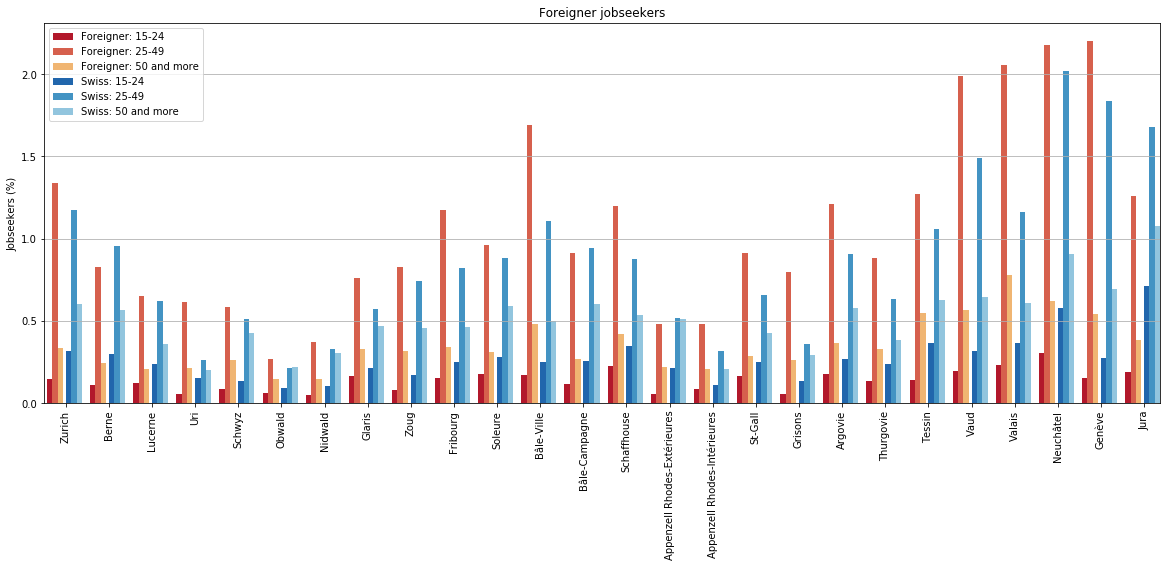

In [80]:
width = 1/8 
colors_foreigners = ['#b2182b','#d6604d','#f0b572']
colors_swiss = ['#2166ac', '#4393c3', '#92c5de']
fig, ax = plt.subplots(figsize=(20,7))
pos = list(range(len(ch_jobseeker_age_foreigner_1['2017'])))
pop = active_pop['2017']

values = ch_jobseeker_age_foreigner_1['2017'].astype(float).values
plt.bar(pos, values/pop*100, width, color=colors_foreigners[0])

values = ch_jobseeker_age_foreigner_2['2017'].astype(float).values
plt.bar([p + width for p in pos], values/pop*100,  width, color=colors_foreigners[1])

values = ch_jobseeker_age_foreigner_3['2017'].astype(float).values
plt.bar([p + width*2 for p in pos], values/pop*100, width, color=colors_foreigners[2])

values = ch_jobseeker_age_swiss_1['2017'].astype(float).values
plt.bar([p + width*3.5 for p in pos], values/pop*100, width, color=colors_swiss[0])

values = ch_jobseeker_age_swiss_2['2017'].astype(float).values
plt.bar([p + width*4.5 for p in pos], values/pop*100, width, color=colors_swiss[1])

values = ch_jobseeker_age_swiss_3['2017'].astype(float).values
plt.bar([p + width*5.5 for p in pos], values/pop*100, width, color=colors_swiss[2])

ax.set_ylabel('Jobseekers (%)')

ax.set_title('Foreigner jobseekers')

ax.set_xticks([p + 3 * width for p in pos])

plt.legend(['Foreigner: 15-24', 'Foreigner: 25-49', 'Foreigner: 50 and more', 'Swiss: 15-24', 'Swiss: 25-49', 'Swiss: 50 and more',], loc='upper left')

catons_names = ch_jobseeker_age_foreigner_1['Canton'].values
ax.set_xticklabels(catons_names)
for tick in ax.get_xticklabels(): #We rotate the ticks for better readability
    tick.set_rotation(90)

plt.xlim(min(pos)-width, max(pos)+width*6)

plt.grid(axis='y')
plt.show()

#### Discussion: 
We can see that there is a bigger difference between the age categories '25-49' and '50 and more' in the foreigner than in the Swiss. This could be due to the fact that foreigner that foreigner of 50 years old and more tend to go back to their origin countries.